[    774    4906   27406  133588  161945  182470  257814  258175  263582
  318612  423917  520079  527529  531310  546485  548454  571628  643469
  664136  687504  749548  768974  858005  930247  955647 1092668 1158600
 1211085 1246080 1294204 1297682 1397282 1397839 1464284 1505041 1565355
 1577199 1640038 1667705 1776144 1790055 1795109 1811894 1858106 1925280
 1991723 2030792 2047266 2233054]
[    24    290   1554   7868   9555  10767  15235  15295  15613  18774
  24445  29418  29871  30150  31009  31084  32459  37034  38374  39873
  43362  44462  49254  53363  54818  61665  64768  67844  69318  71621
  71873  77567  77625  80942  83177  86447  87072  91010  92688  98274
  99208  99572 100415 102946 107047 111077 113279 113994 124258]


/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_19037/2712376018.py:126: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


"\n\nsubr=radius[np.isin(ids,subid)]\nprint(len(subr))\nx=com_star[:,0][np.isin(ids,submain)]\ny=com_star[:,1][np.isin(ids,submain)]\nz=com_star[:,2][np.isin(ids,submain)]\nr=radius[np.isin(ids,submain)]\nsubO=O[BCGid!=mainid]*subr*1000\nxs=com_star[:,0][np.isin(ids,subid)]\nys=com_star[:,1][np.isin(ids,subid)]\nzs=com_star[:,2][np.isin(ids,subid)]\nrs=radius[np.isin(ids,subid)]\n\n#mask2=True#(subO*subr*1000<200)\n#mass[mask]/mass[mask3]\n\n\nsc=ax.scatter(x[subO<200],y[subO<200],s=r[subO<200]**2*np.pi,c=z[subO<200],alpha=0.5)\nax.scatter(xs[subO<200],ys[subO<200],s=rs[subO<200]**2*np.pi,c='k',alpha=0.5)\nprint(len(BCGid[BCGid!=mainid]))\nplt.colorbar(sc)\n#ax.set_yscale('log')\n"

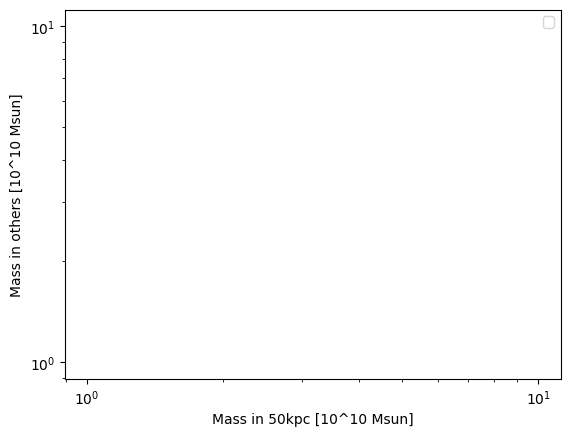

In [9]:
import h5py
import numpy as np
import unyt
import swiftsimio as sw
from swiftsimio import load
import swiftgalaxy as sg
import functions as fn
from matplotlib import colors
import matplotlib.pyplot as plt

path="/Users/24756376/data/Flamingo/L1000N1800/"


f=h5py.File(path+'compare_most_massive_sat_3000kpc.hdf5','r')
s=f["PartType0"]
#Brightid=np.array(s["Brightid"])
#Bright2ndid=np.array(s["Bright2ndid"])
mostmassiveid=np.array(s["Brightid"])
cebtralid=np.array(s["centralid"])
R3000=np.array(s["Rmass"])
f.close()

f=h5py.File(path+'compare_most_massive_sat.hdf5','r')
s=f["PartType0"]

mostmassiveid=np.array(s["Brightid"])
cebtralid=np.array(s["centralid"])
R100=np.array(s["Rmass"])
f.close()

f=h5py.File(path+'halos.hdf5','r')
halo_id=np.array(f["halos"]["id"])
radius=np.array(f["halos"]["r200"])
r200=np.array(f["halos"]["r200"])
host_id=np.array(f["halos"]["hostid"])
mass=np.array(f["halos"]["mass"])
mbp=np.array(f["halos"]["center"])

com_star=np.array(f["halos"]["com_star_100kpc"])
star_lumz=np.array(f["halos"]["lumz_100kpc"])
star_lumz50=np.array(f["halos"]["lumz_50kpc"])
star_lumz300=np.array(f["halos"]["lumz_300kpc"])
star_lumz3000=np.array(f["halos"]["lumz_3000kpc"])
ms=np.array(f["halos"]["mass_star_100kpc"])
ms50=np.array(f["halos"]["mass_star_50kpc"])
ms300=np.array(f["halos"]["mass_star_300kpc"])
ms3000=np.array(f["halos"]["mass_star_1000kpc"])
f.close()

path="/Users/24756376/data/Flamingo/L1000N0900/"
f=h5py.File(path+'compare_most_massive_sat_3000kpc.hdf5','r')
s=f["PartType0"]

mostmassiveid2=np.array(s["Brightid"])
cebtralid2=np.array(s["centralid"])
R30002=np.array(s["Rmass"])
f.close()
f=h5py.File(path+'compare_most_massive_sat.hdf5','r')
s=f["PartType0"]


R1002=np.array(s["Rmass"])
f.close()
f=h5py.File(path+'halos.hdf5','r')
halo_id2=np.array(f["halos"]["id"])
host_id2=np.array(f["halos"]["hostid"])
mass2=np.array(f["halos"]["mass"])
com_star2=np.array(f["halos"]["com_star_100kpc"])
mbp2=np.array(f["halos"]["center"])
ms2=np.array(f["halos"]["mass_star_100kpc"])
r2002=np.array(f["halos"]["r200"])
ms30002=np.array(f["halos"]["mass_star_1000kpc"])
f.close()

#ignore all the halos without models of star lum and com
rs=np.sqrt(com_star[:,0]**2+com_star[:,1]**2+com_star[:,2]**2)
mask=(rs>-1)
halo_id=halo_id[mask]
host_id=host_id[mask]
mbp=mbp[mask]
r200=r200[mask]

com_star=com_star[mask]
star_lumz=star_lumz[mask]
star_lumz50=star_lumz50[mask]
star_lumz300=star_lumz300[mask]
star_lumz3000=star_lumz3000[mask]
mass=mass[mask]
radius=radius[mask]
ms=ms[mask]
ms50=ms50[mask]
ms300=ms300[mask]
ms3000=ms3000[mask]
ids2=np.arange(0,len(halo_id2),1)
mainmass=mass[(host_id==-1)*(mass>10000)]
mainmass2=mass2[(host_id2==-1)*(mass2>10000)]
mainms100=ms[(host_id==-1)*(mass>10000)]
mainms1002=ms2[(host_id2==-1)*(mass2>10000)]
mainms=ms[(host_id==-1)*(mass>10000)]
mainms2=ms2[(host_id2==-1)*(mass2>10000)]
mbpc=mbp[(host_id==-1)*(mass>10000)]
mbpc2=mbp2[(host_id2==-1)*(mass2>10000)]
r200c=r200[(host_id==-1)*(mass>10000)]
r200c2=r2002[(host_id2==-1)*(mass2>10000)]
print(halo_id2[(host_id2==-1)*(ms2<20)])
print(ids2[(host_id2==-1)*(ms2<20)])
'''
cebtralid=cebtralid[Brightid!=-1]
Bright2ndid=Bright2ndid[Brightid!=-1]
Brightids=Brightid[Brightid!=-1]
'''

fig=plt.figure()
ax=plt.subplot(1,1,1)
#ax.scatter(mass[host_id==-1],ms[host_id==-1],s=1,alpha=0.1,label='100kpc')
#ax.scatter(ms50[host_id==-1],star_lumz[host_id==-1],s=1,alpha=0.1)
#ax.scatter(ms50[host_id!=-1],ms300[host_id!=-1],color='g',s=1,alpha=0.1,label='300kpc')
#ax.scatter(ms50[host_id!=-1],ms3000[host_id!=-1],s=1,alpha=0.1,label='3000kpc')
#ax.plot(np.linspace(10**0.5,10**2,100),np.linspace(10**0.5,10**2,100))
#ax.set_xlim(10**0.5,10**2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Mass in 50kpc [10^10 Msun]')
ax.set_ylabel('Mass in others [10^10 Msun]')
#ax.hlines(y=68,xmin=1,xmax=100,linestyles="dashed")
ax.legend()

'''

subr=radius[np.isin(ids,subid)]
print(len(subr))
x=com_star[:,0][np.isin(ids,submain)]
y=com_star[:,1][np.isin(ids,submain)]
z=com_star[:,2][np.isin(ids,submain)]
r=radius[np.isin(ids,submain)]
subO=O[BCGid!=mainid]*subr*1000
xs=com_star[:,0][np.isin(ids,subid)]
ys=com_star[:,1][np.isin(ids,subid)]
zs=com_star[:,2][np.isin(ids,subid)]
rs=radius[np.isin(ids,subid)]

#mask2=True#(subO*subr*1000<200)
#mass[mask]/mass[mask3]


sc=ax.scatter(x[subO<200],y[subO<200],s=r[subO<200]**2*np.pi,c=z[subO<200],alpha=0.5)
ax.scatter(xs[subO<200],ys[subO<200],s=rs[subO<200]**2*np.pi,c='k',alpha=0.5)
print(len(BCGid[BCGid!=mainid]))
plt.colorbar(sc)
#ax.set_yscale('log')
'''

995


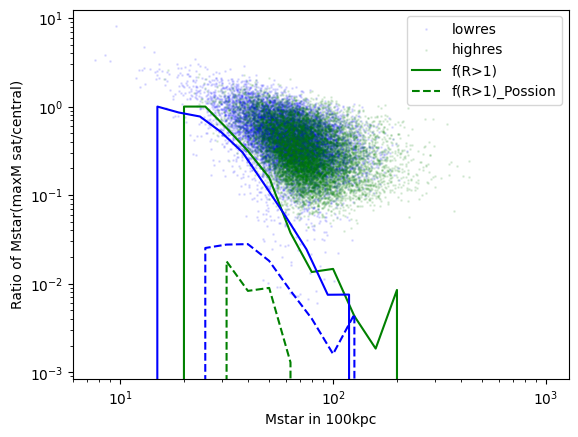

In [ ]:




lb=np.zeros(len(mainmass))
l2b=np.zeros(len(mainmass))


fig=plt.figure()
ax=plt.subplot(1,1,1)
ax.scatter(mainms2,R1002,s=1,alpha=0.1,label='lowres',color='b')
ax.scatter(mainms,R100,s=1,alpha=0.1,label='highres',color='g')
bin=np.digitize(mainms,10**np.linspace(1,3,21))
bin2=np.digitize(mainms2,10**np.linspace(1,3,21))
Rm=np.zeros(20)
Rm2=np.zeros(20)
RmP=np.zeros(20)
RmP2=np.zeros(20)
bins=10**(np.linspace(1,3,21)[0:20]+(2/20))
bins2=10**(np.linspace(1,3,21)[0:20]+(1.5/20))
for i in range(1,20):
  if len(mainms2[bin2==i+1])!=0:
    Rm2[i]=len(mainms2[(R1002>1)*(bin2==i+1)])/len(mainms2[bin2==i+1])
    RmP2[i]=len(mainms2[(R1002>1)*(bin2==i+1)*(R1002<(1+1/np.sqrt(bins2[i]/0.061)))])/len(mainms2[bin2==i+1])
  if len(mainms[bin==i+1])!=0:
    Rm[i]=len(mainms[(R100>1)*(bin==i+1)])/len(mainms[bin==i+1])
    RmP[i]=len(mainms[(R100>1)*(bin==i+1)*(R100<(1+1/np.sqrt(bins[i]/0.0078)))])/len(mainms[bin==i+1])

#ax.scatter(mainms100,R100,s=1,alpha=0.1,label='highres,100kpc')
#ax.scatter(mainms1002,R1002,s=1,alpha=0.1,label='lowres,100kpc')
#print(len(R1002[R1002==0]))
ax.legend()
#ax.scatter(lb[Brightids==cebtralid],(lb/l2b)[Brightids==cebtralid],s=1,alpha=0.2)
#ax.scatter(l2b[Brightids!=cebtralid],(lb/l2b)[Brightids!=cebtralid],s=1,alpha=0.2)
#ax.plot(np.linspace(10**2,10**3,100),(1+np.sqrt(np.linspace(10**2,10**3,100))/(np.linspace(10**2,10**3,100)-np.sqrt(np.linspace(10**2,10**3,100)))),color='k')
#ax.plot(np.linspace(2*10**2,2*10**3,100),np.linspace(2*10**2,2*10**3,100))
bin30002,mf30002=fn.massfunction(ms2[host_id2==-1])
ax.plot(bins,Rm,label="f(R>1)",color='g')
ax.plot(bins2,Rm2,color='b')
ax.plot(bins,RmP,label="f(R>1)_Possion",linestyle="dashed",color='g')
ax.plot(bins,RmP2,linestyle="dashed",color='b')
ax.legend()
bin3000,mf3000=fn.massfunction(ms[host_id==-1])
#ax.plot(10**bin3000,mf3000/np.sum(mf3000),'b',label="Mass in 3000kpc, highres")
ax.set_xlabel("Mstar in 100kpc")
ax.set_ylabel("Ratio of Mstar(maxM sat/central)")
ax.set_xscale('log')
ax.set_yscale('log')
print(len(R1002[R1002>1]))


In [ ]:
path="/Users/24756376/data/Flamingo/L1000N0900/"
f=h5py.File(path+'massBCG_exr100kpc.hdf5','r')
mainid=np.array(f["PartType0"]["mainid"])
BCGid=np.array(f["PartType0"]["BCGid"])
print(len(BCGid[(mainid!=BCGid)*(BCGid!=-1)]))
#mainid=mainid[BCGid!=-1]
#BCGid=BCGid[BCGid!=-1]
f.close()
comb=np.zeros((len(mainmass2),3))
#lb=ms[np.isin(ids,Brightids)]/0.068
#l2b=ms[np.isin(ids,Bright2ndid)]/0.068

for i in range(0,len(mainmass2)):
#  lb[i]=ms[int(Brightids[i])]/0.068#/star_lumz[int(Brightids[i])]
#  l2b[i]=ms[int(Bright2ndid[i])]/0.068#/star_lumz[int(Bright2ndid[i])]
  comb[i]=com_star2[int(BCGid[i])]
d=comb-mbpc2

ratiomass=np.sqrt(d[:,0]**2+d[:,1]**2+d[:,2]**2)/r200c2
fig=plt.figure()
ax=plt.subplot(1,1,1)
ax.hist(ratiomass[mainid==BCGid],alpha=0.5,bins=10**(np.linspace(-4,-1,50)),label="mostmassive is center")
ax.hist(ratiomass[mainid!=BCGid],alpha=0.5,bins=10**(np.linspace(-4,1,50)),label="mostmassive is not center")
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("D between mbp and CoM_mostmassive(<100kpc)/Mpc")
ax.set_ylabel("N")
ax.vlines(x=0.01,ymin=10**-0.5,ymax=10**3.5,color='k',linestyle='dashed',label="softening")
ax.legend()

428


IndexError: index 124913 is out of bounds for axis 0 with size 124849

0
73


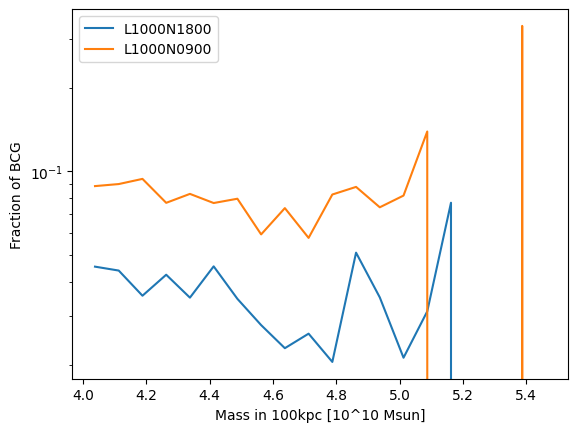

In [8]:
f=h5py.File('/Users/24756376/data/Flamingo/L1000N1800/massBCG_exr100kpc.hdf5','r')
s=f["PartType0"]
fBCG=np.array(s['fBCG'])
massbin=np.array(s['massbin'])
mainid=np.array(s['mainid'])
BCGid=np.array(s['BCGid'])
f.close()
f=h5py.File('/Users/24756376/data/Flamingo/L1000N0900/massBCG_exr100kpc.hdf5','r')
s=f["PartType0"]
fBCG2=np.array(s['fBCG'])
massbin2=np.array(s['massbin'])
mainid2=np.array(s['mainid'])
BCGid2=np.array(s['BCGid'])
f.close()
print(len(mainid[BCGid==-1]))
print(len(mainid2[BCGid2==-1]))
fig=plt.figure()
ax=plt.subplot(1,1,1)
ax.plot(massbin,fBCG,label="L1000N1800")
ax.plot(massbin2,fBCG2,label="L1000N0900")
ax.set_xlabel('Mass in 100kpc [10^10 Msun]')
ax.set_ylabel('Fraction of BCG')
ax.legend()
#ax.set_xbound(4,5.2)
ax.set_yscale('log')

In [4]:
f=h5py.File('/Users/24756376/data/Flamingo/L1000N0900/massBCG_exr100kpc.hdf5','r')
s=f["PartType0"]
mainid2=np.array(s['mainid'])
BCGid2=np.array(s['BCGid'])
f.close()
print(mainid2[(mainid2!=BCGid2)*(mainms2<20)])


[    24    290   1554   7868   9555  10767  15235  15295  15613  18774
  24445  29418  29871  30150  31009  31084  32459  37034  38374  39873
  43362  44462  49254  53363  54818  61665  64768  67844  69318  71621
  71873  77567  77625  80942  83177  86447  91010  92688  98274  99208
  99572 100415 107047 111077 113279]


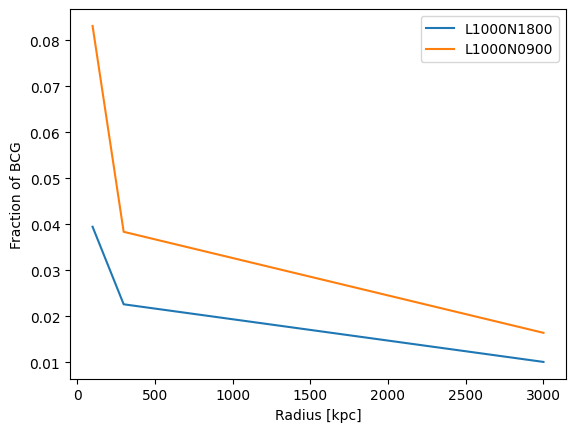

In [12]:
FBCG=np.zeros(3)
f=h5py.File('/Users/24756376/data/Flamingo/L1000N1800/massBCG_exr100kpc.hdf5','r')
s=f["PartType0"]
mainid=np.array(s['mainid'])
BCGid=np.array(s['BCGid'])
FBCG[0]=len(mainid[(BCGid!=-1)*(BCGid!=mainid)])/len(mainid)
f.close()
f=h5py.File('/Users/24756376/data/Flamingo/L1000N1800/massBCG_exr300kpc.hdf5','r')
s=f["PartType0"]
mainid=np.array(s['mainid'])
BCGid=np.array(s['BCGid'])
FBCG[1]=len(mainid[(BCGid!=-1)*(BCGid!=mainid)])/len(mainid)
f.close()
f=h5py.File('/Users/24756376/data/Flamingo/L1000N1800/massBCG_exr3000kpc.hdf5','r')
s=f["PartType0"]
mainid=np.array(s['mainid'])
BCGid=np.array(s['BCGid'])
FBCG[2]=len(mainid[(BCGid!=-1)*(BCGid!=mainid)])/len(mainid)
f.close()
FBCG2=np.zeros(3)
f=h5py.File('/Users/24756376/data/Flamingo/L1000N0900/massBCG_exr100kpc.hdf5','r')
s=f["PartType0"]
mainid=np.array(s['mainid'])
BCGid=np.array(s['BCGid'])
FBCG2[0]=len(mainid[(BCGid!=-1)*(BCGid!=mainid)])/len(mainid)
f.close()
f=h5py.File('/Users/24756376/data/Flamingo/L1000N0900/massBCG_exr300kpc.hdf5','r')
s=f["PartType0"]
mainid=np.array(s['mainid'])
BCGid=np.array(s['BCGid'])  
FBCG2[1]=len(mainid[(BCGid!=-1)*(BCGid!=mainid)])/len(mainid)
f.close()
f=h5py.File('/Users/24756376/data/Flamingo/L1000N0900/massBCG_exr3000kpc.hdf5','r')
s=f["PartType0"]
mainid=np.array(s['mainid'])
BCGid=np.array(s['BCGid'])
FBCG2[2]=len(mainid[(BCGid!=-1)*(BCGid!=mainid)])/len(mainid)
fig=plt.figure()
ax=plt.subplot(1,1,1)
ax.plot([100,300,3000],FBCG,label="L1000N1800")
ax.plot([100,300,3000],FBCG2,label="L1000N0900")
ax.set_xlabel('Radius [kpc]')
ax.set_ylabel('Fraction of BCG')
ax.legend()

In [2]:
dir="../../../mnt/su3-pro/colibre/L0200N1504/THERMAL_AGN/SOAP/halo_properties_0127.hdf5"

data_h=sw.load(dir)
center=np.array(data_h.input_halos.halo_centre)
radius=np.array(data_h.bound_subhalo.enclose_radius)
data_h=[]

In [1]:
id=12975221
  
dir="../../../mnt/su3-pro/colibre/L0200N1504/THERMAL_AGN/SOAP"
r=radius[id]*unyt.Mpc
print(r)
sgi=sg.SWIFTGalaxy(dir+"/colibre_with_SOAP_membership_0127.hdf5",
                   sg.SOAP(dir+"/halo_properties_0127.hdf5",soap_index=id))

  


#  print(len(sgi.stars.spherical_coordinates.r))
xs=np.array(sgi.stars.cartesian_coordinates.x)
ys=np.array(sgi.stars.cartesian_coordinates.y)
zs=np.array(sgi.stars.cartesian_coordinates.z)
xdm=np.array(sgi.dark_matter.cartesian_coordinates.x)
ydm=np.array(sgi.dark_matter.cartesian_coordinates.y)
zdm=np.array(sgi.dark_matter.cartesian_coordinates.z)
#  PartType2=np.array([xdm,ydm,zdm]).T


NameError: name 'radius' is not defined

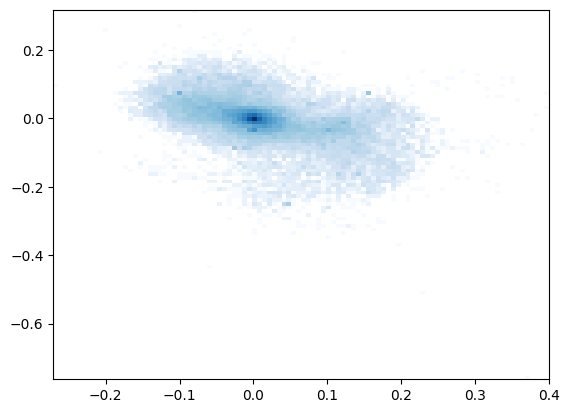

In [40]:
lum=sgi.stars.luminosities.GAMA_z
r=radius[id]
fig = plt.figure()
ax=plt.subplot(1,1,1) 
h=ax.hist2d(xs/r,ys/r,cmap='Blues',bins=100,norm=colors.LogNorm())

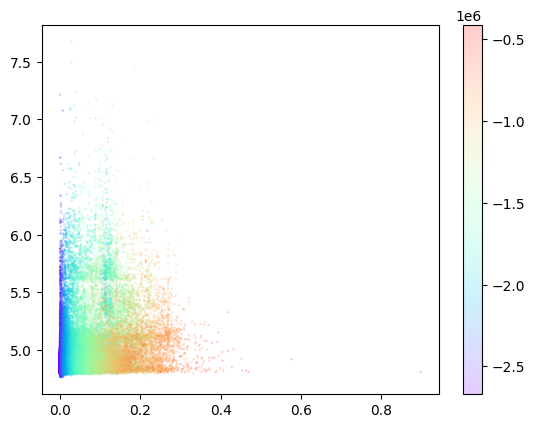

In [41]:
lum=sgi.stars.luminosities.GAMA_z
p=sgi.stars.potentials
rs=sgi.stars.spherical_coordinates.r/r
fig = plt.figure()
ax=plt.subplot(1,1,1)

sc=ax.scatter(rs,np.log10(lum),s=0.5,alpha=0.2,c=p,cmap='rainbow')
plt.colorbar(sc)